In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
df=pd.read_csv("creditcard.csv")
df.shape

(284807, 31)

In [3]:
credit_card=df.copy()

In [4]:
credit_card.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
249752,154562.0,2.017549,0.018322,-1.630912,0.358423,0.266270,-0.694315,-0.000943,-0.027973,0.417480,...,-0.315359,-0.903835,0.365869,0.634362,-0.357106,0.146891,-0.074774,-0.041472,1.98,0
79799,58185.0,1.287238,-0.493365,0.084430,-0.629766,-0.922664,-1.103746,-0.143764,-0.186763,-1.319307,...,-0.688316,-1.718449,0.242956,0.502143,-0.038839,0.644042,-0.094875,0.002785,44.95,0
193111,129996.0,-0.899117,-0.935088,1.674759,-3.572173,-0.351881,0.264314,-0.380166,0.340483,-2.039323,...,-0.349155,-1.021222,-0.014433,0.094474,0.374442,-0.559343,-0.015991,0.052118,68.12,0
67268,52446.0,1.135567,-0.169040,-1.499213,0.254864,2.276585,3.429436,-0.156924,0.743012,-0.085159,...,-0.038474,-0.289139,-0.255325,1.023276,0.967839,-0.254309,-0.004213,0.021379,86.20,0
46111,42641.0,-0.726481,1.035551,1.287026,-1.093826,-0.672028,-1.315354,0.239127,0.314288,-0.215122,...,-0.033607,-0.140290,0.059384,0.774856,-0.245216,0.702173,0.057009,0.009587,3.84,0


In [5]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All of the columns are numerical so we do not need to worry about encoding.

In [6]:
credit_card.isnull().mean()*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [7]:
def drop_duplicates(df):
    print("Checking for duplicate values")
    num_duplicates=credit_card.duplicated().sum()
    print(f"There are {num_duplicates} values")
    if num_duplicates>0:
        df.drop_duplicates(keep="first",inplace=True)
        print(f"{num_duplicates} rows deleted")
    else:
         print("No duplicates values!")


In [8]:
drop_duplicates(credit_card)

Checking for duplicate values
There are 1081 values
1081 rows deleted


In [9]:
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


##### Basic Summary of the Data:
1. There are no missing values
2. There were 1081 duplictated rows which has been deleted
3. All of the columns are numeric so we do not need to worry about encoding

### EDA

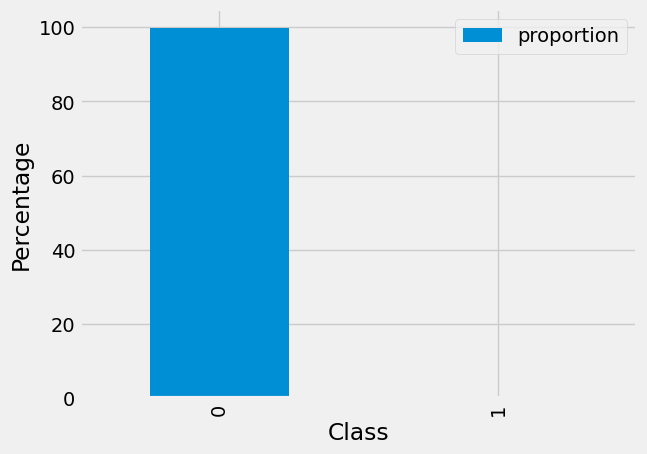

In [10]:
credit_card['Class'].value_counts(normalize=True).mul(100).plot(kind='bar',ylabel="Percentage")

plt.legend()
plt.show()

In [11]:
credit_card['Class'].value_counts(normalize=True).mul(100)

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

The class is highly imbalanced so need to use some techniques to avoid such imbalances.

#### Univariate Analysis:

In [12]:
numerical_columns=[cols for cols in df.columns if df[cols].dtype in ['float64']]
len(numerical_columns)

30

In [13]:
import statsmodels.api as sm
def univariate_plot(numerical_col):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,8))

    sns.kdeplot(data=credit_card,x=numerical_col,ax=ax[0],color='blue')
    sns.boxplot(data=credit_card,y=numerical_col,ax=ax[1],color='red')

    ax[0].set_title(f'KDE Plot of {numerical_col}')
    ax[1].set_title(f'Boxplot of {numerical_col}')

    #Statistics
    mean=credit_card[numerical_col].mean()
    median=credit_card[numerical_col].median()
    std=credit_card[numerical_col].std()
    skew=credit_card[numerical_col].skew()

    stats_text=(
        f"Mean:{round(mean,2)}\n"
        f"Median:{round(median,2)}\n"
        f"Std:{round(std,2)}\n"
        f"Skew:{round(skew,3)}\n"  
    )
    
    ax[0].text(
        0.98,0.98,
        stats_text,
        ha='right',
        va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.7,edgecolor='black',linewidth=1.5),
        fontsize=10
    )


    plt.show()

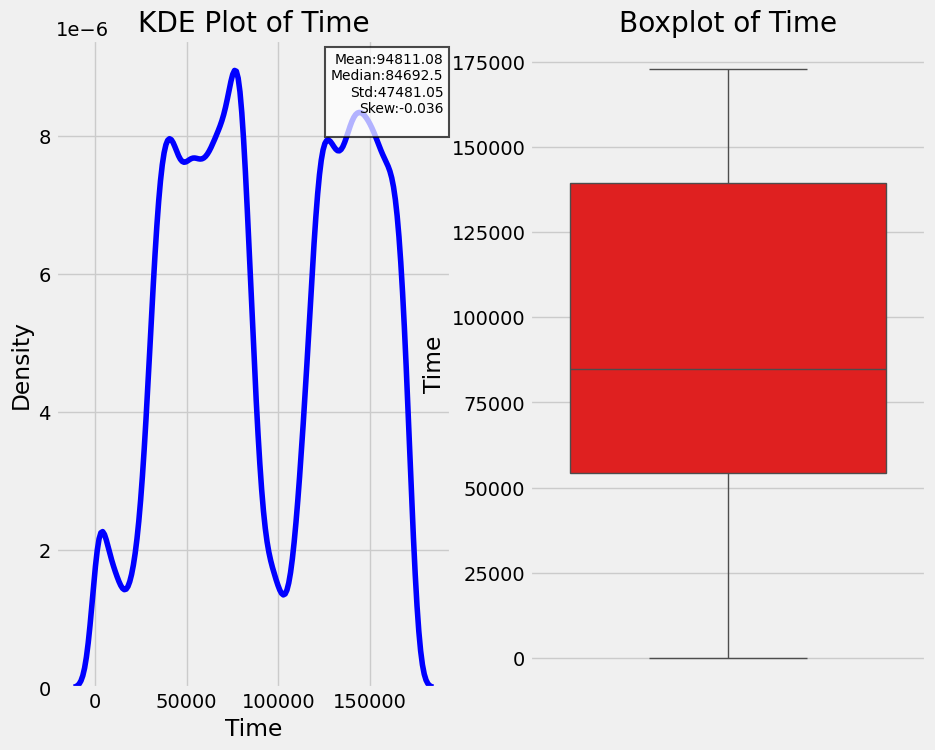

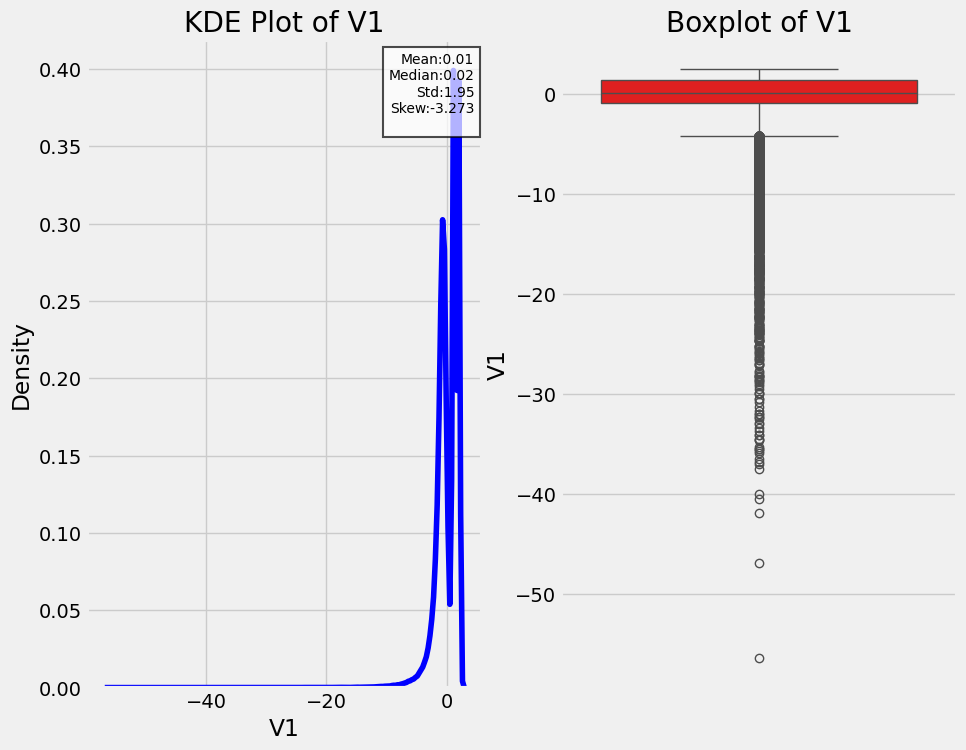

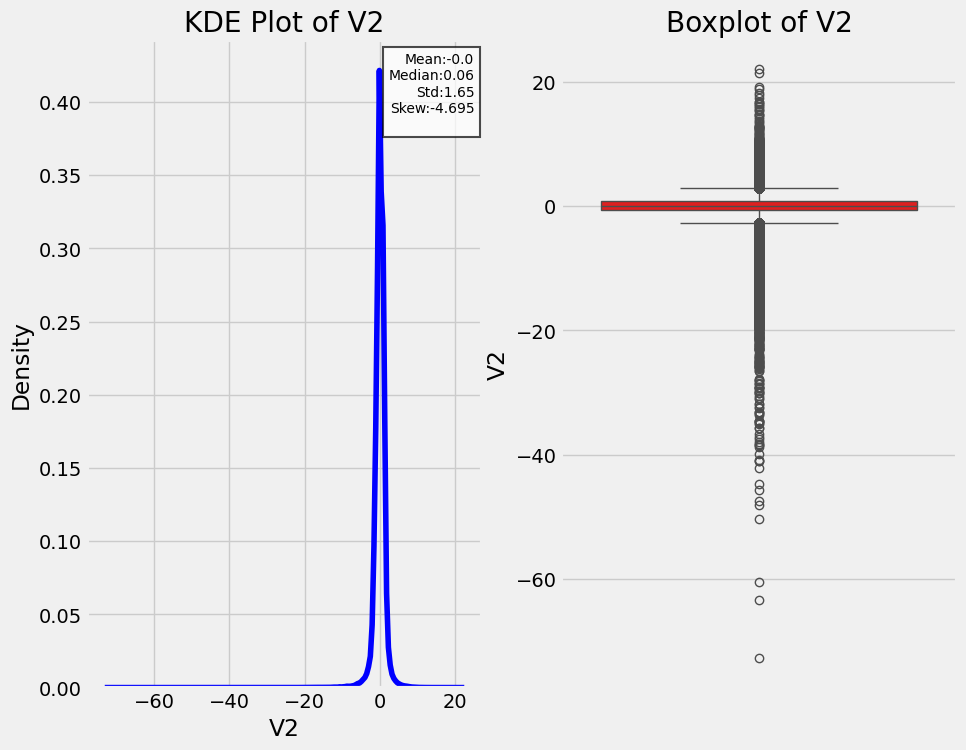

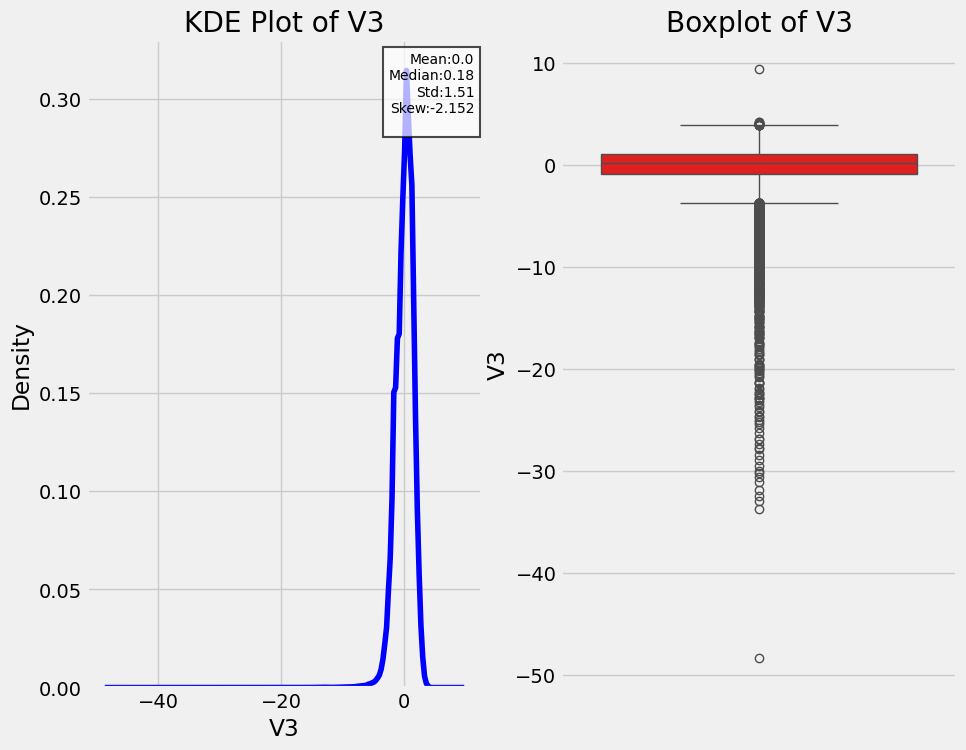

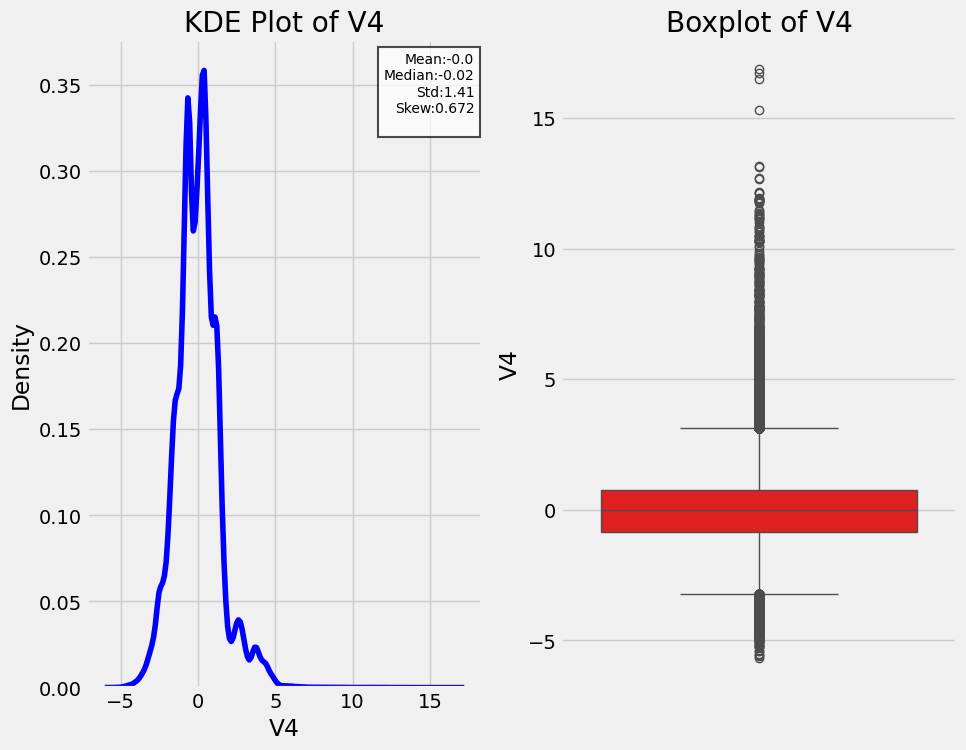

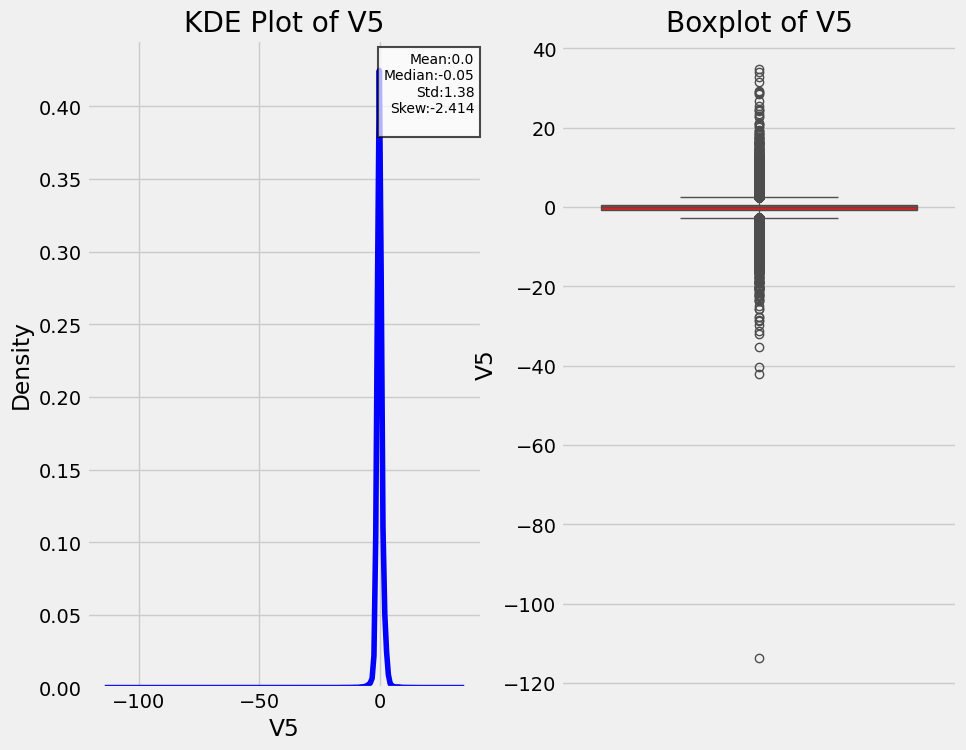

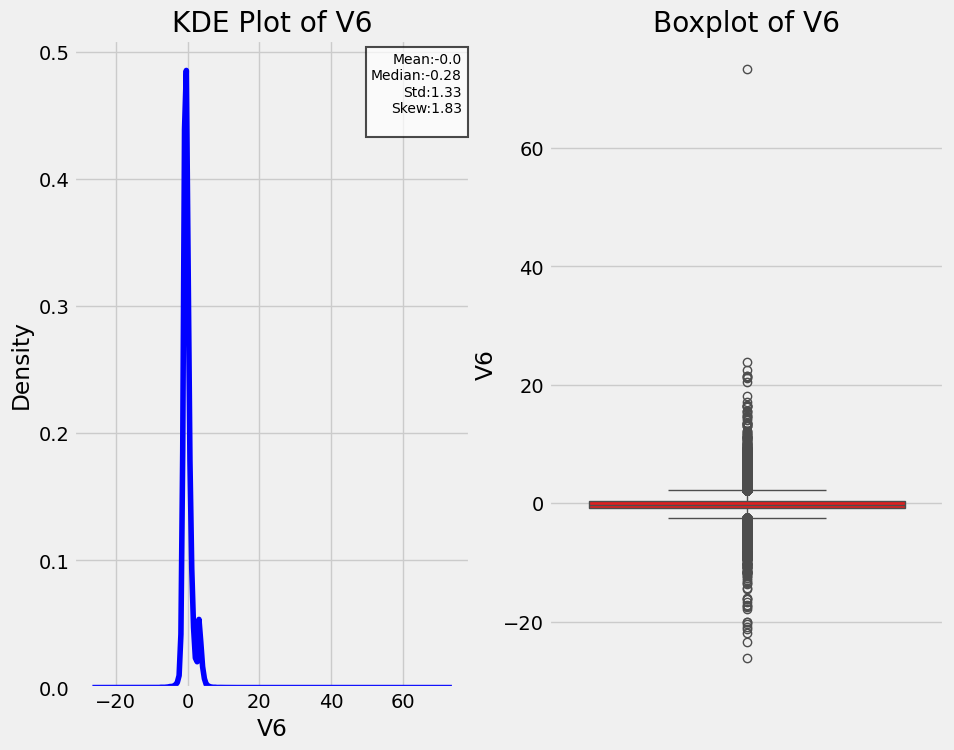

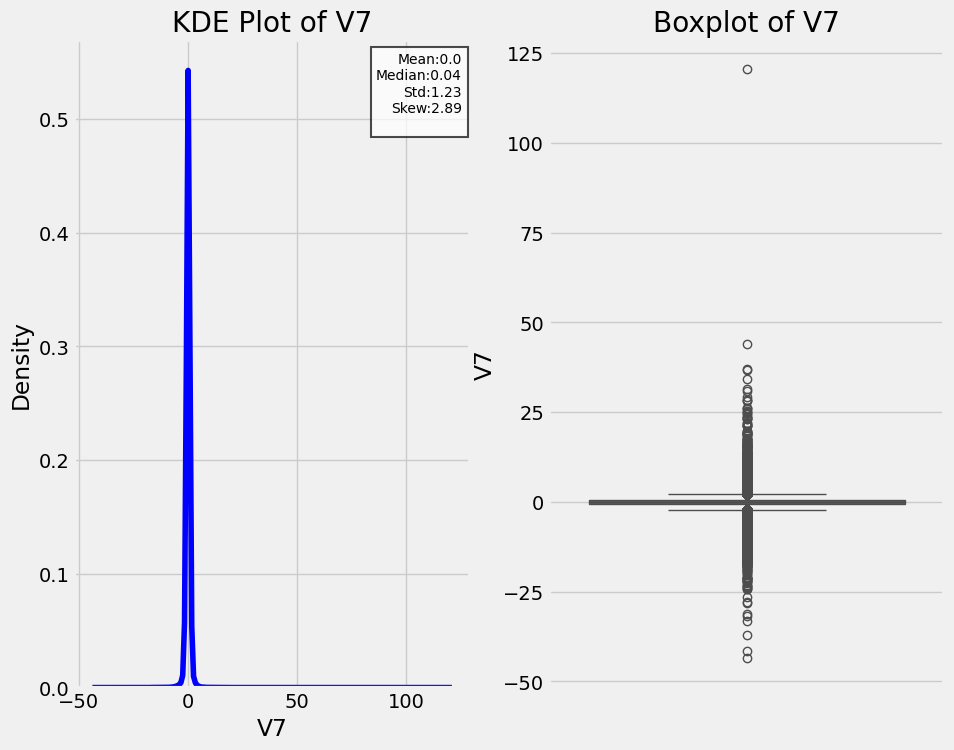

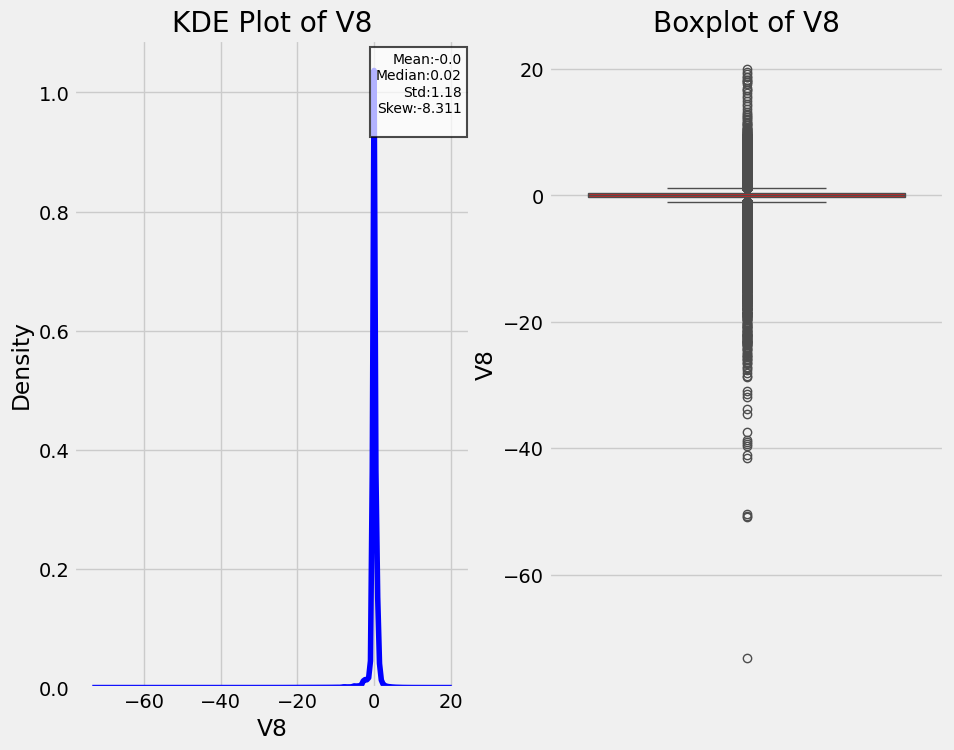

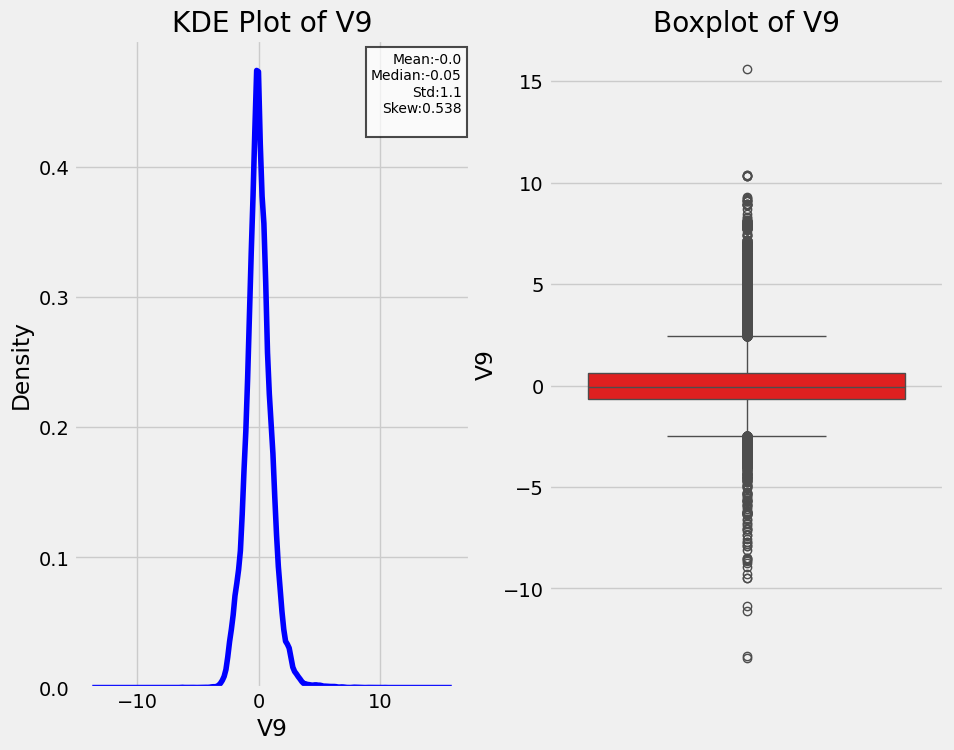

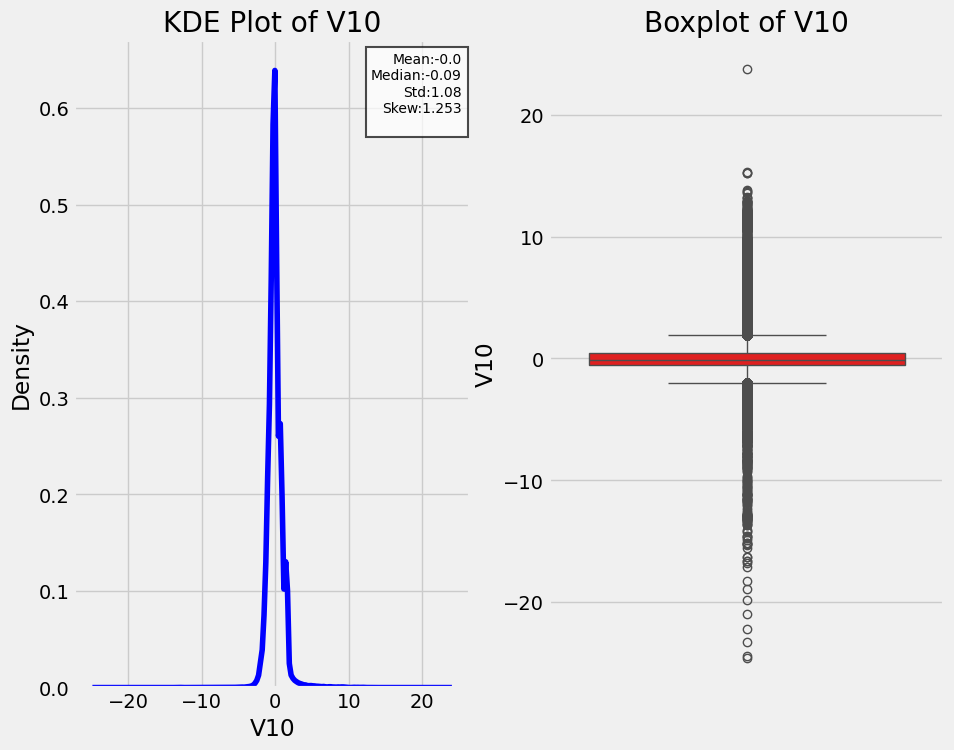

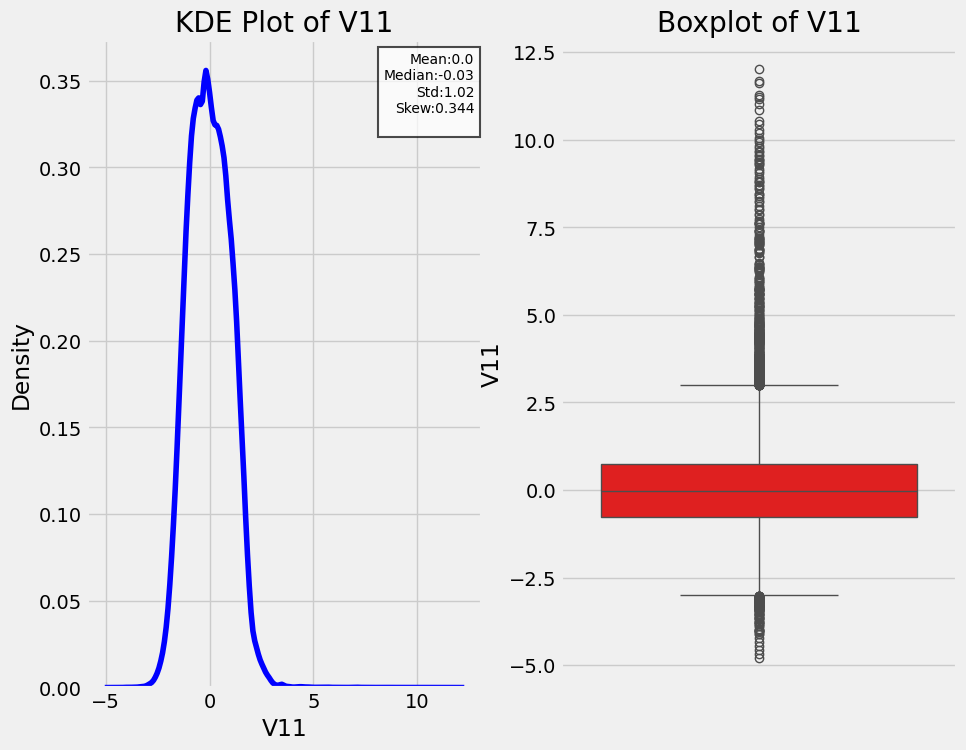

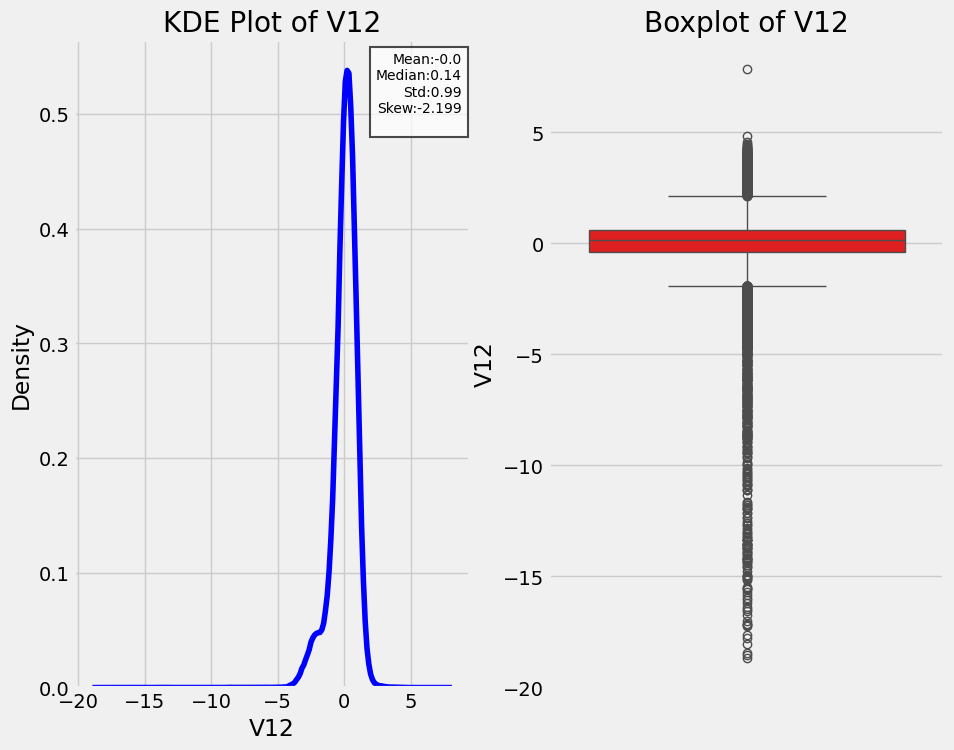

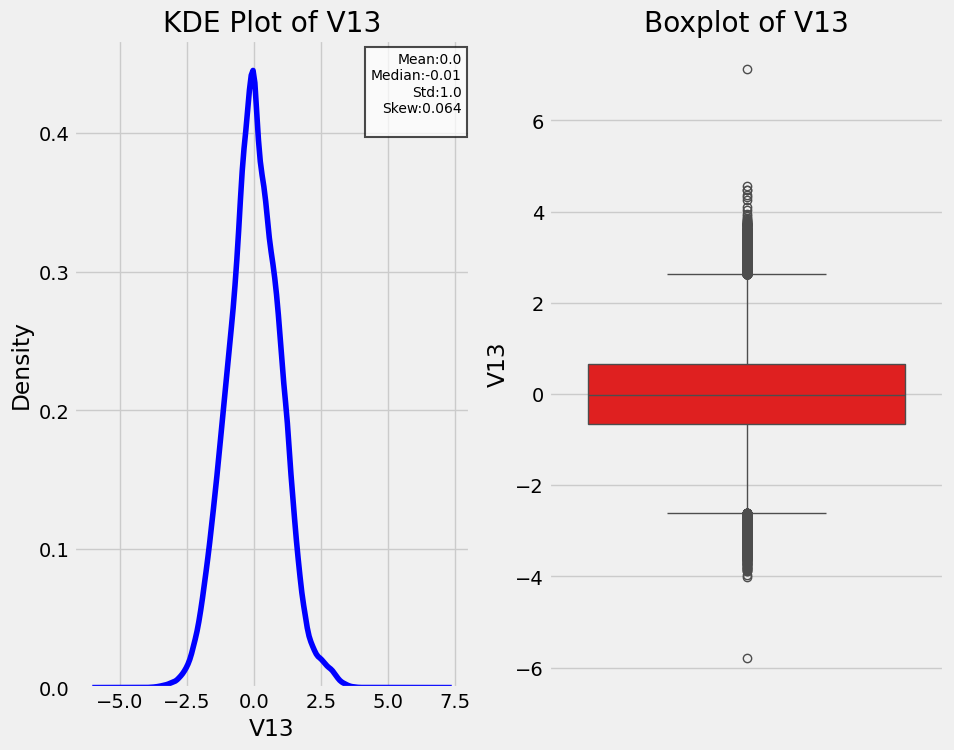

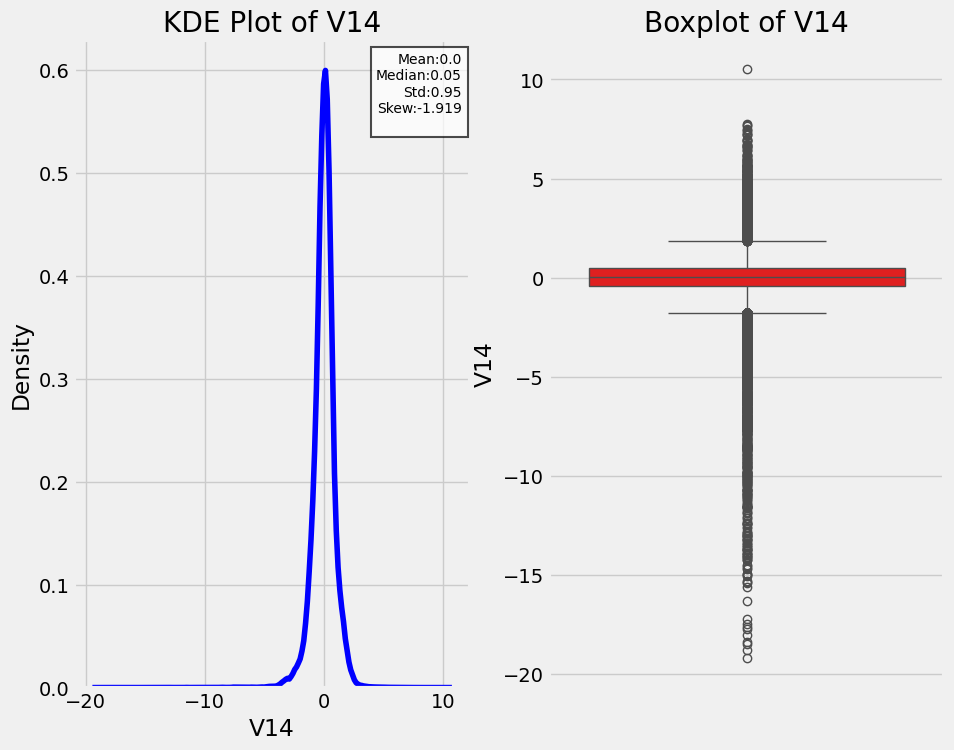

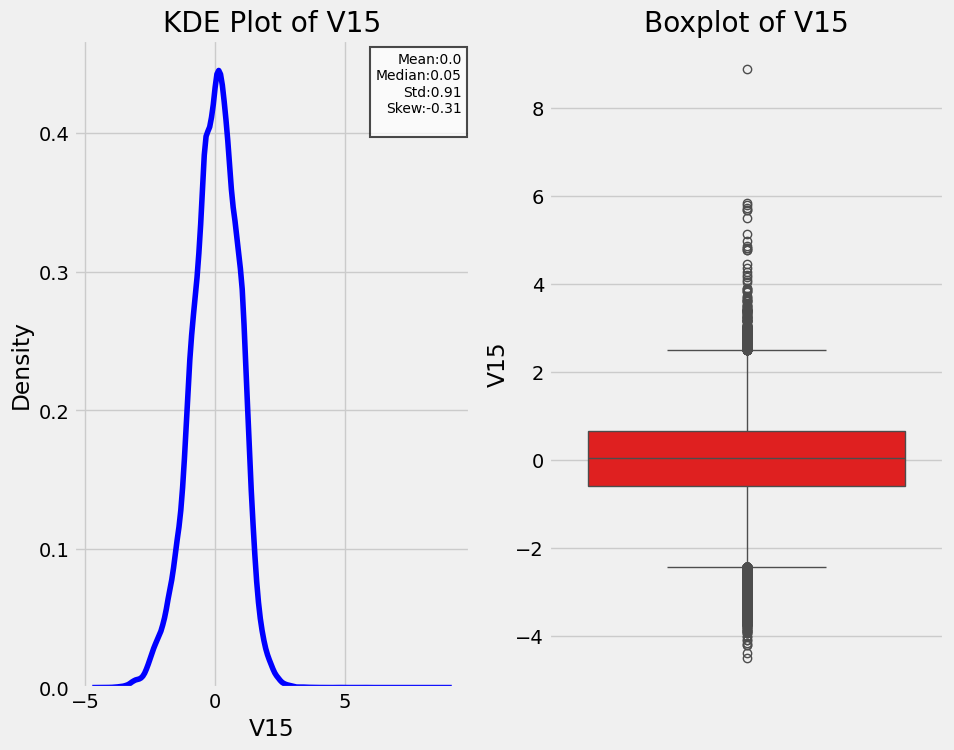

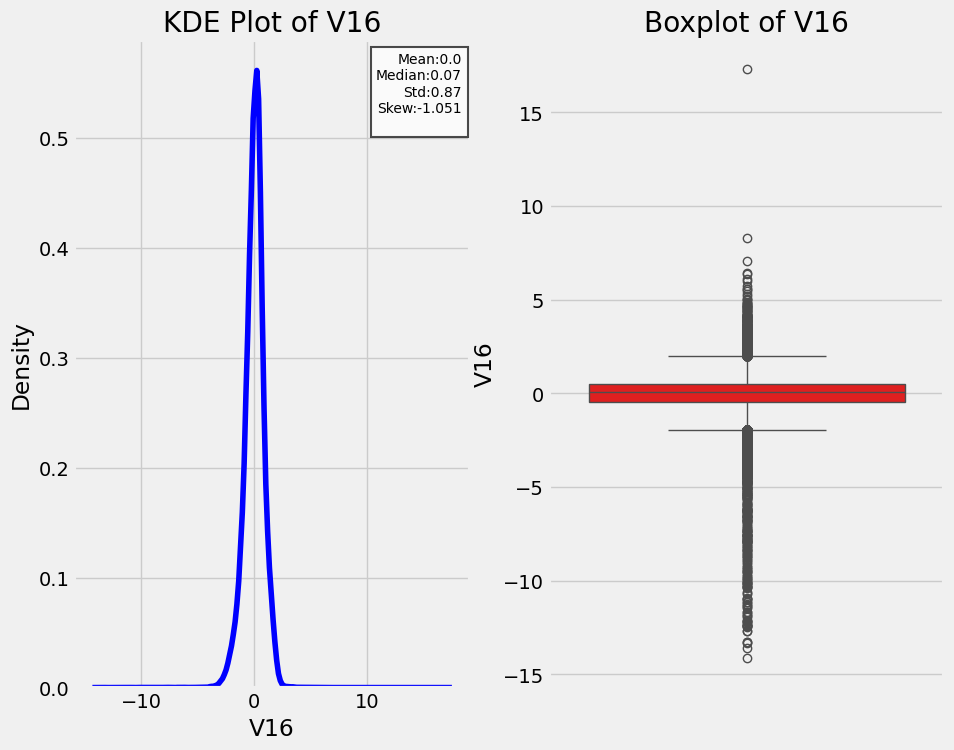

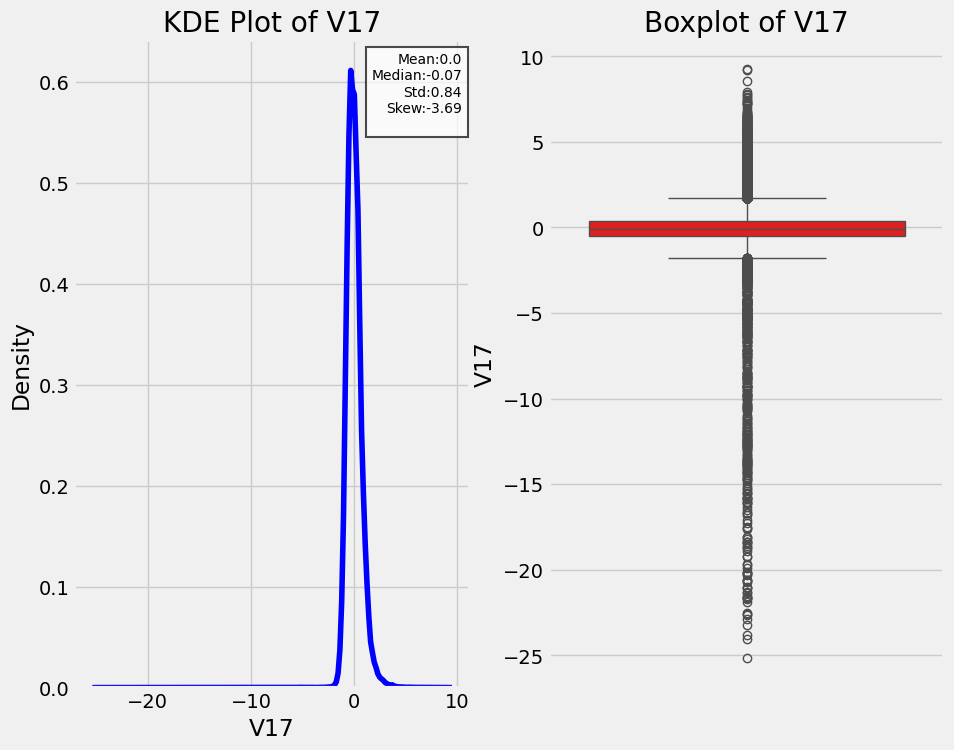

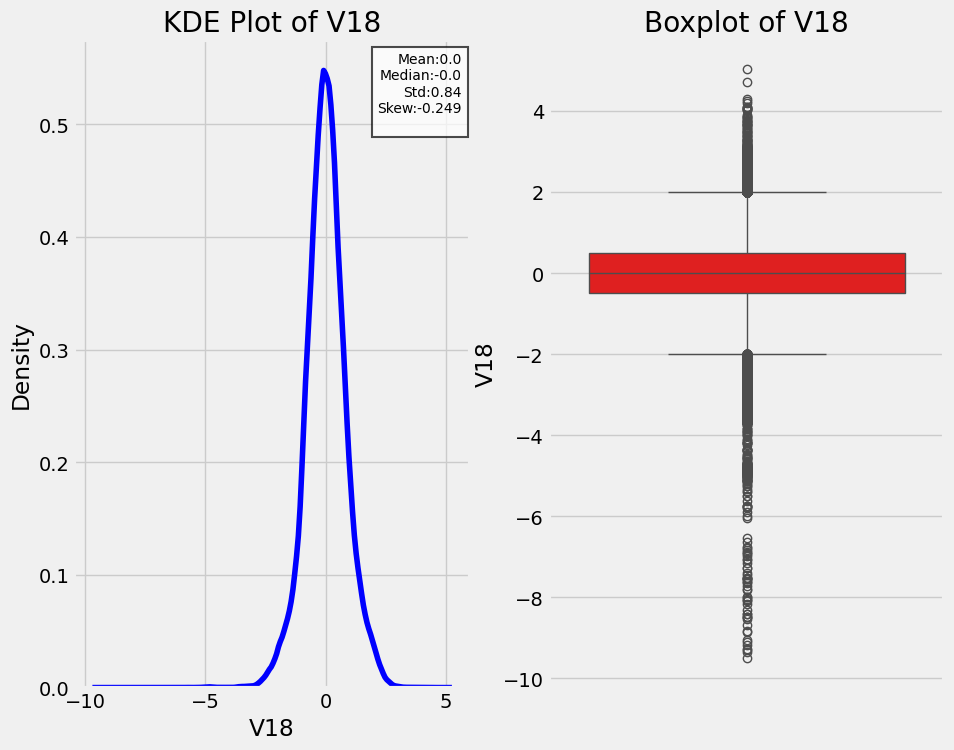

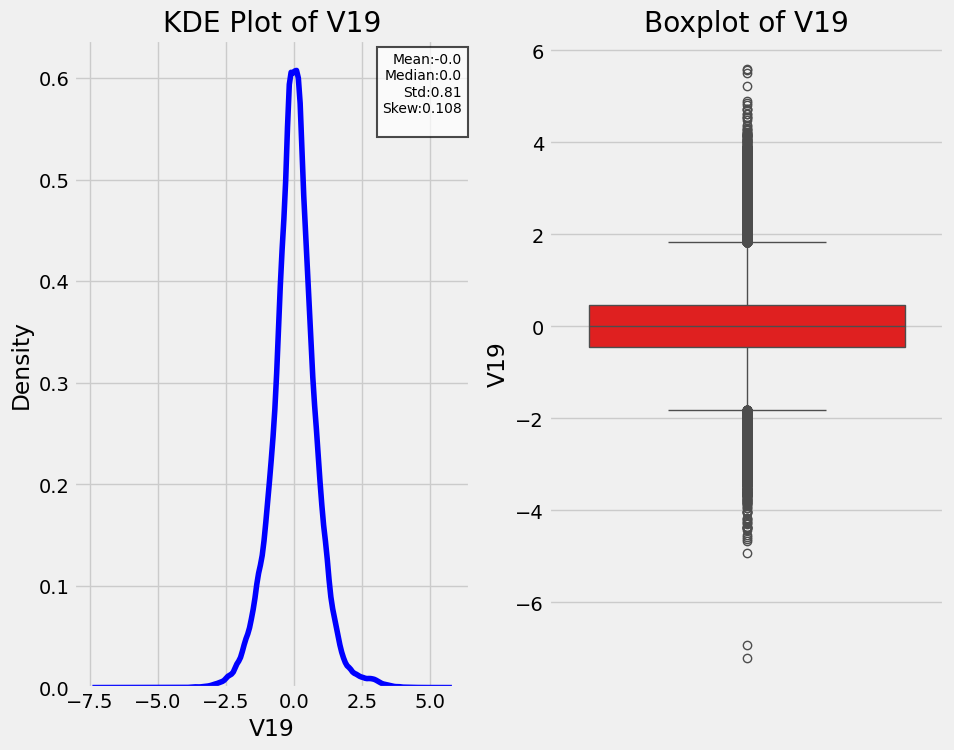

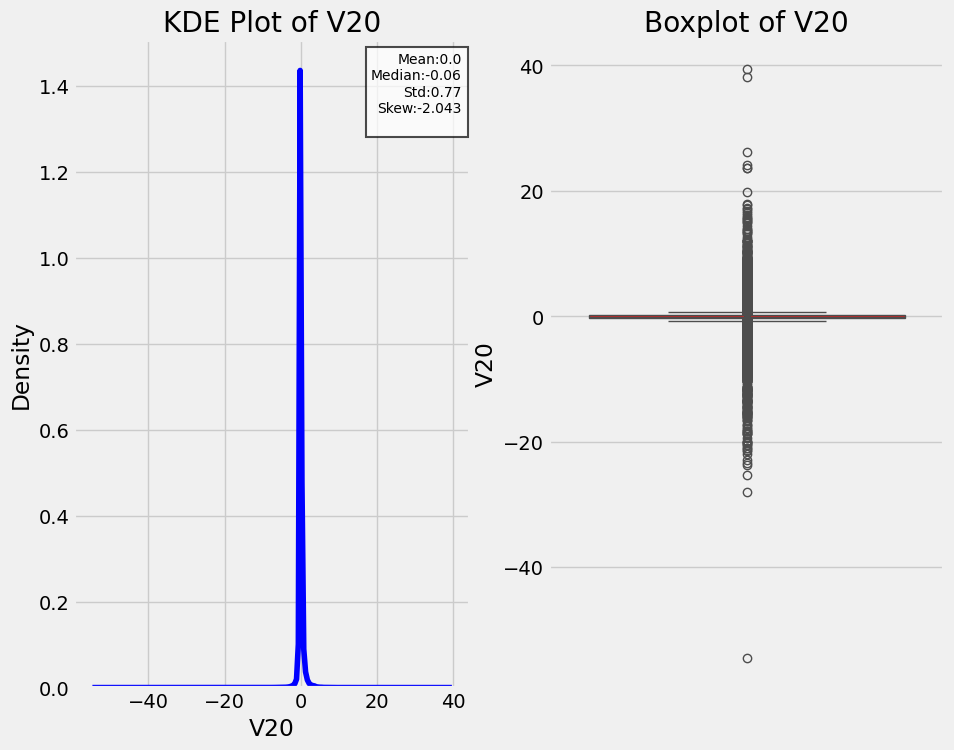

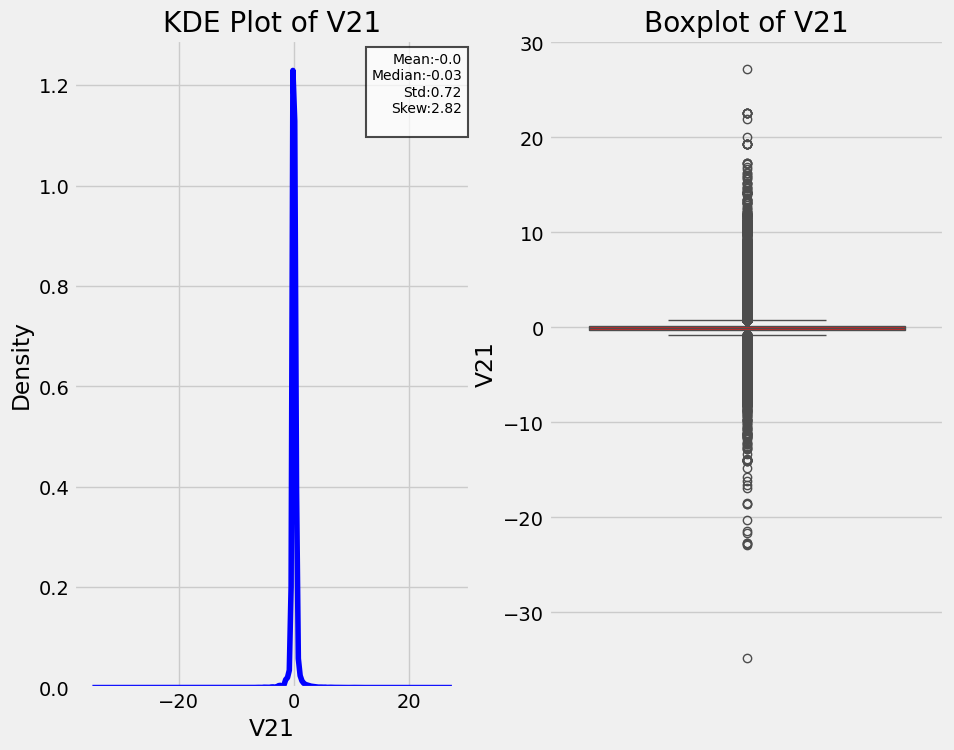

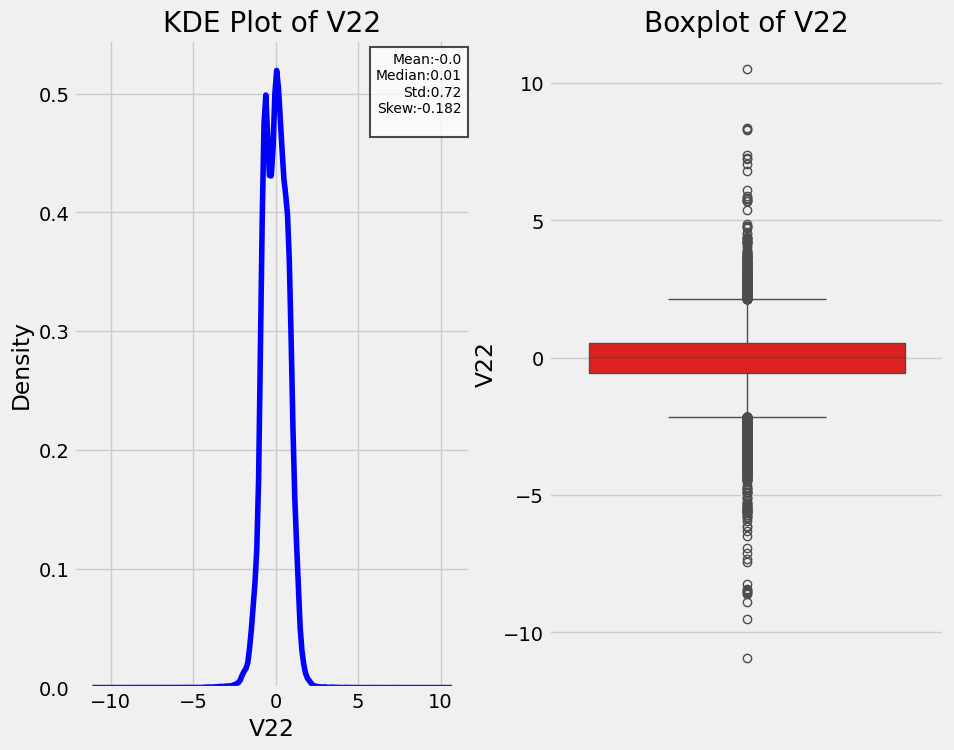

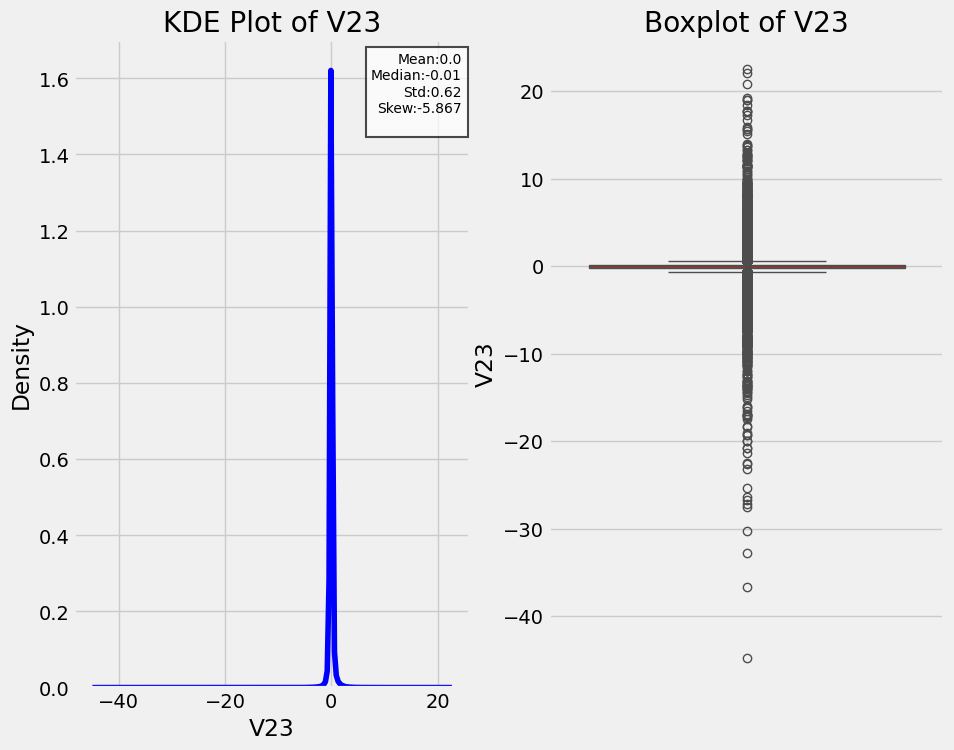

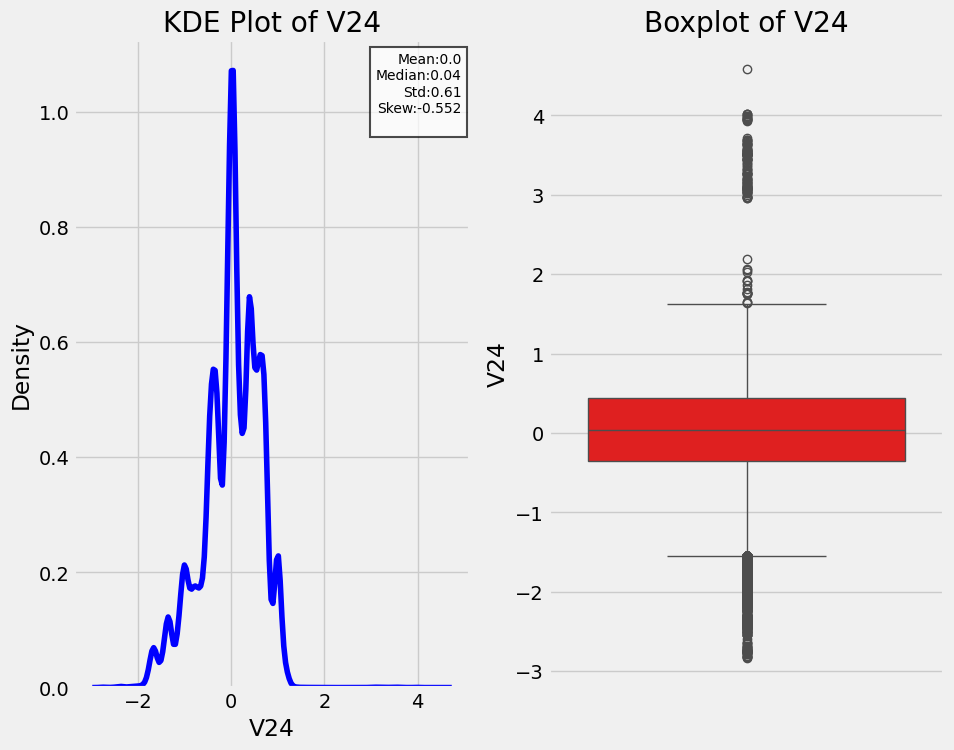

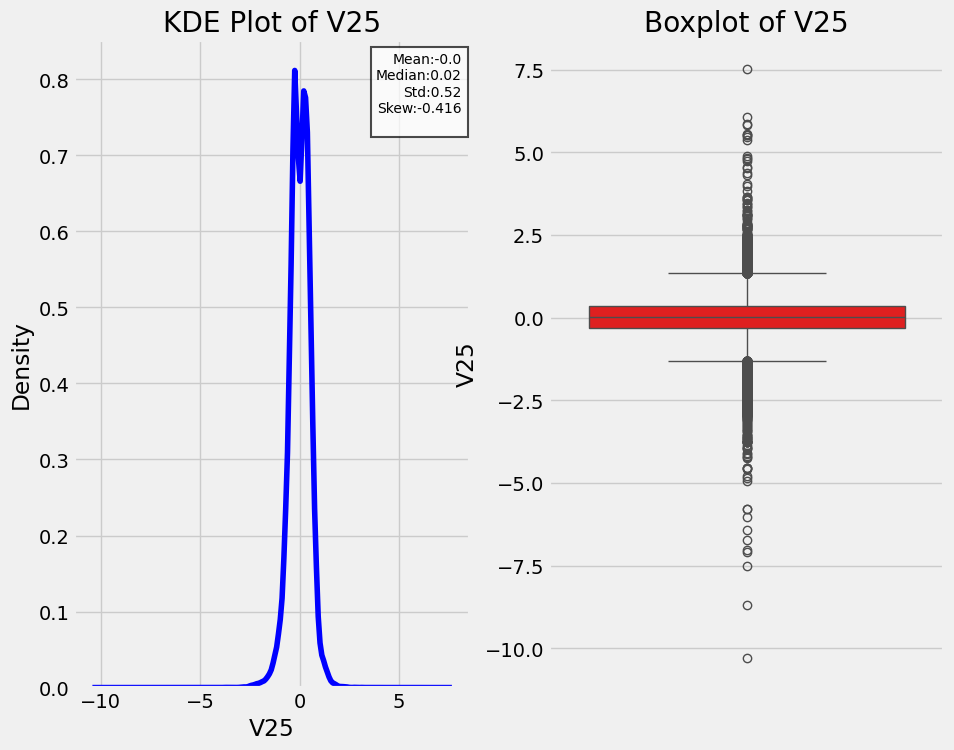

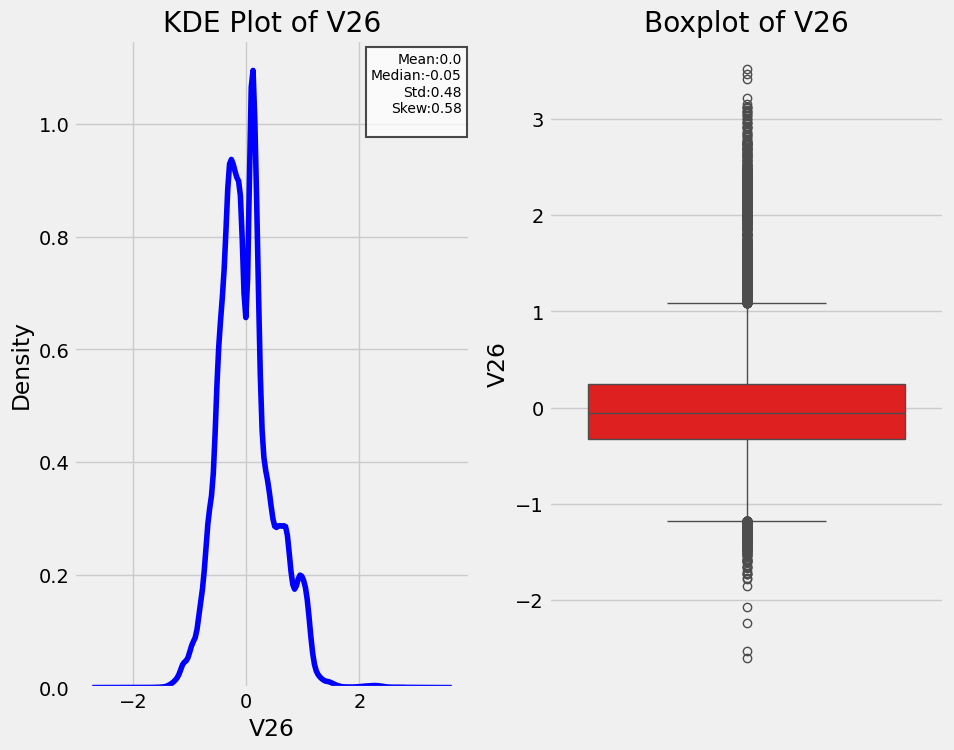

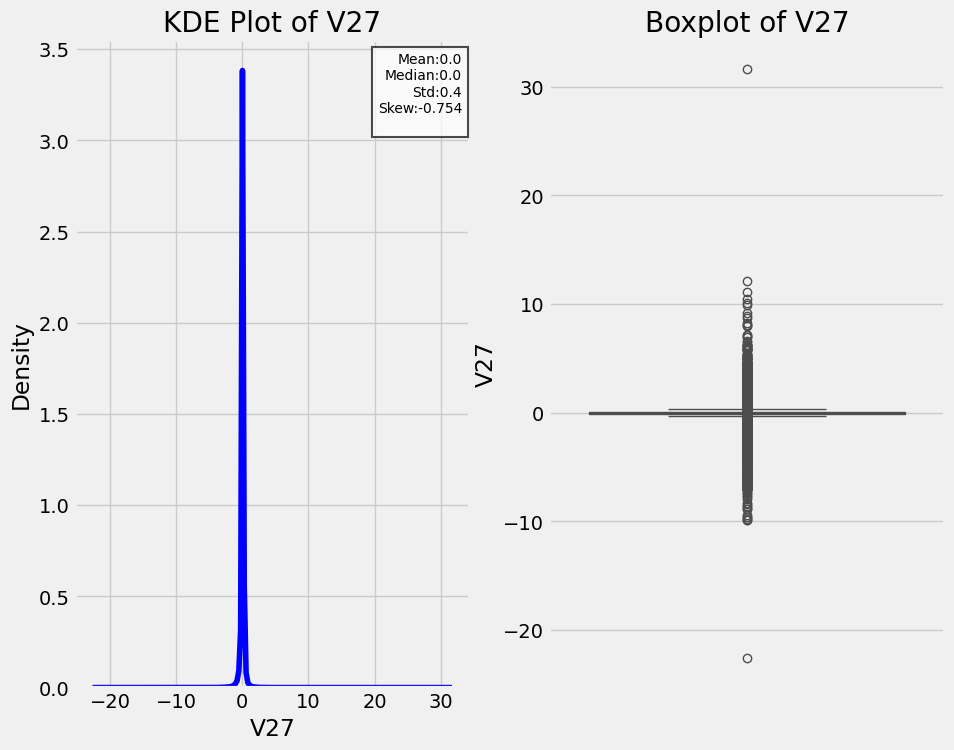

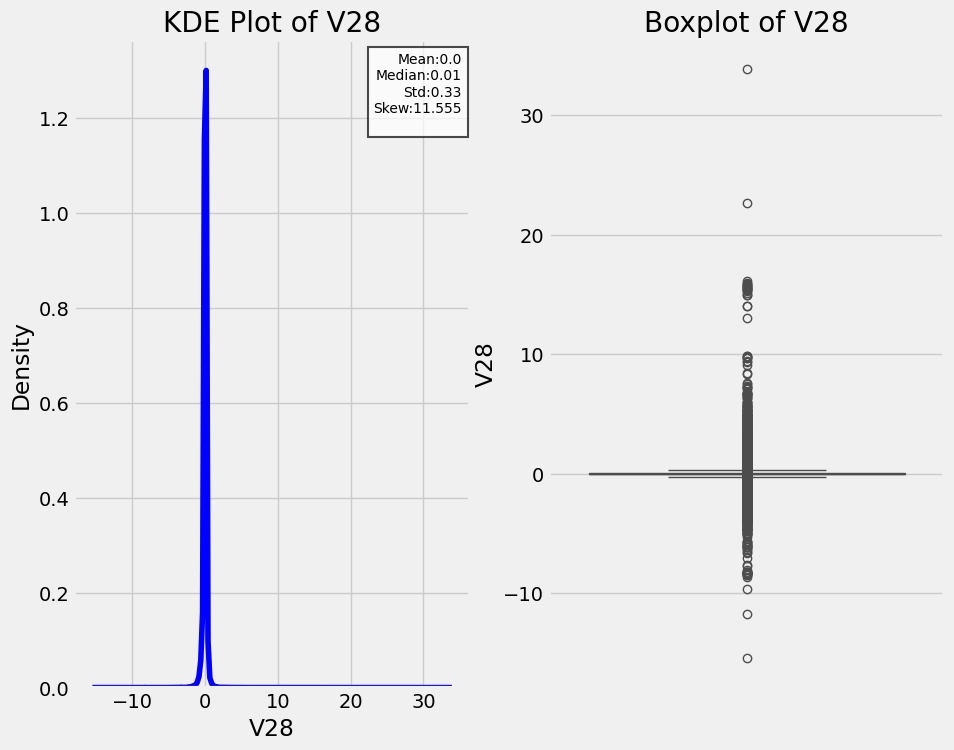

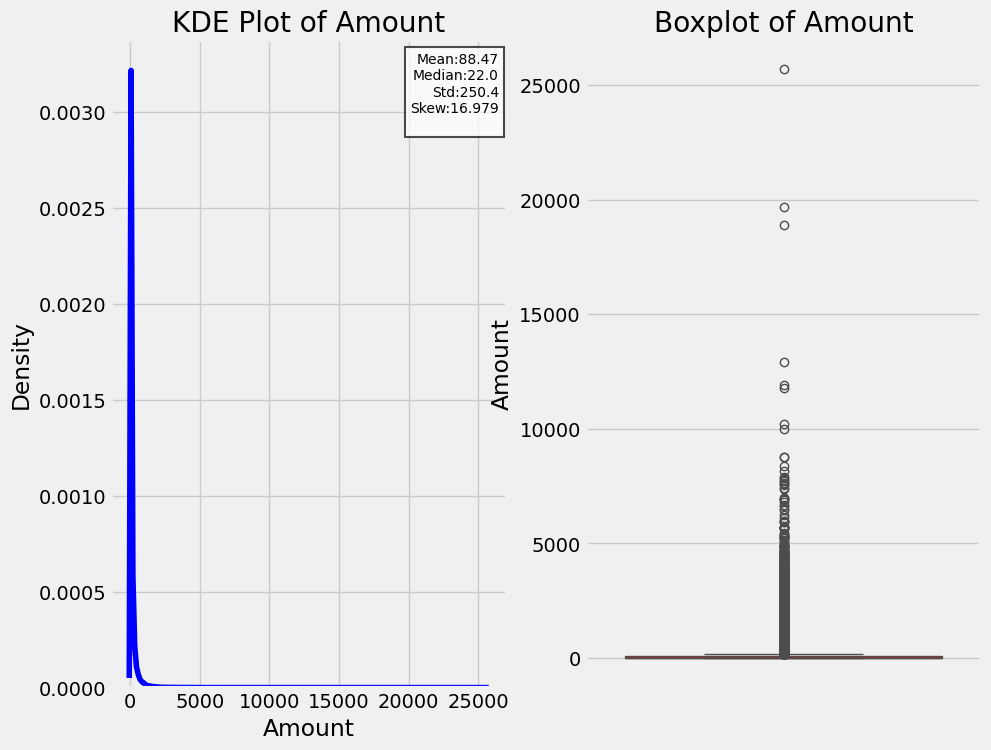

In [14]:
for cols in numerical_columns:
    univariate_plot(cols)

Some of the numerical fetaures are heavily skewed and some of them have a lot of outliers, thus while feature selection I have to take this into consideration. 

In [15]:
fraud_amount=credit_card[credit_card['Class']==1]
geniune_amount=credit_card[credit_card['Class']==0]

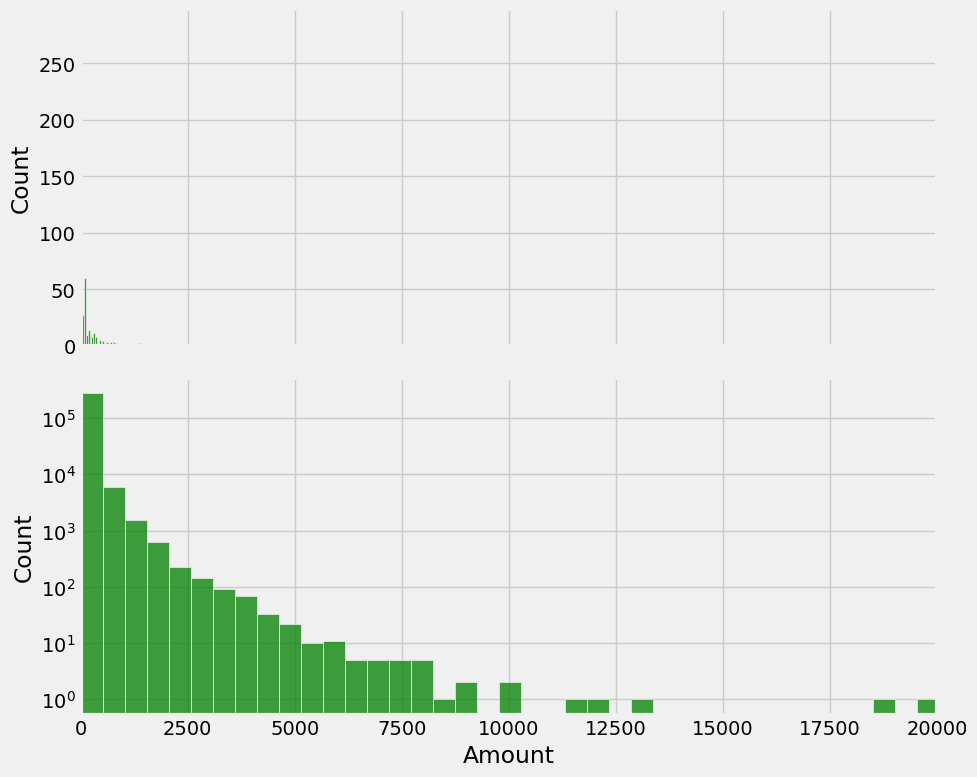

In [25]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)

sns.histplot(data=fraud_amount,x='Amount',color='green',ax=ax[0],bins=50)
ax[0].set_title("Histogram of Amount for fraud Cases")
sns.histplot(data=geniune_amount,x='Amount',color='green',ax=ax[1],bins=50)
ax[1].set_title("Histogram of Amount for Genuine Cases")
ax[1].set_xlim(0, 20000)
ax[1].set_yscale('log') 
 
plt.tight_layout()
plt.show()